In [40]:
import cv2
import skimage
import matplotlib.pyplot as plt 
import numpy as np
from scipy import ndimage as nd 
import skimage
from skimage.measure import label

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [2]:
img = cv2.imread('water_coins.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

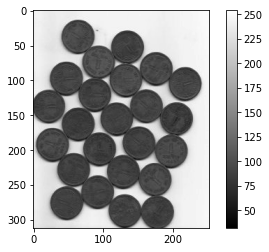

In [3]:
plt.imshow(gray, cmap='gray')
plt.colorbar()
plt.show()

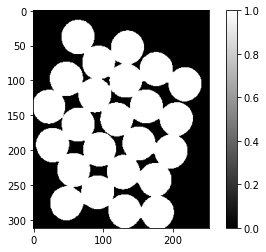

In [4]:
th_img = gray < 150
plt.imshow(th_img, cmap='gray')
plt.show()
# removing small artifact 
th_img = nd.binary_opening(th_img, np.ones((3,3)))
plt.imshow(th_img, cmap='gray')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


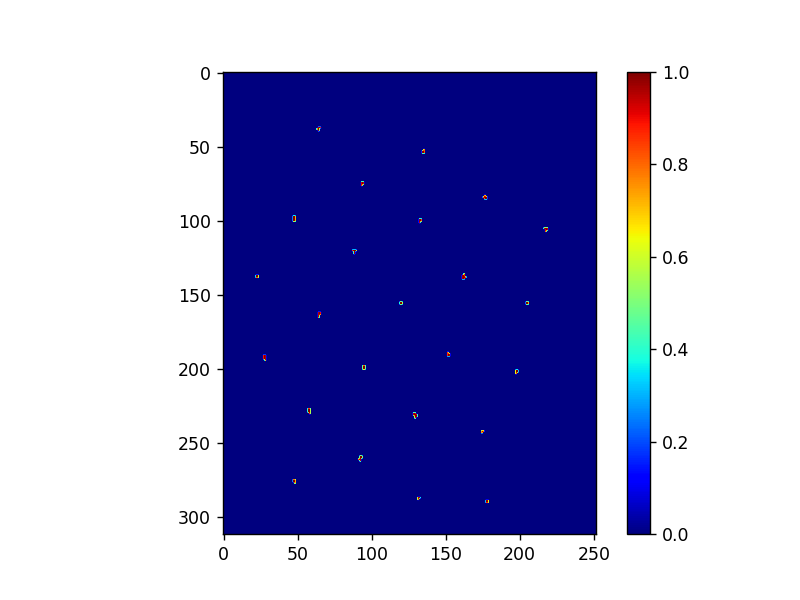

<IPython.core.display.Javascript object>


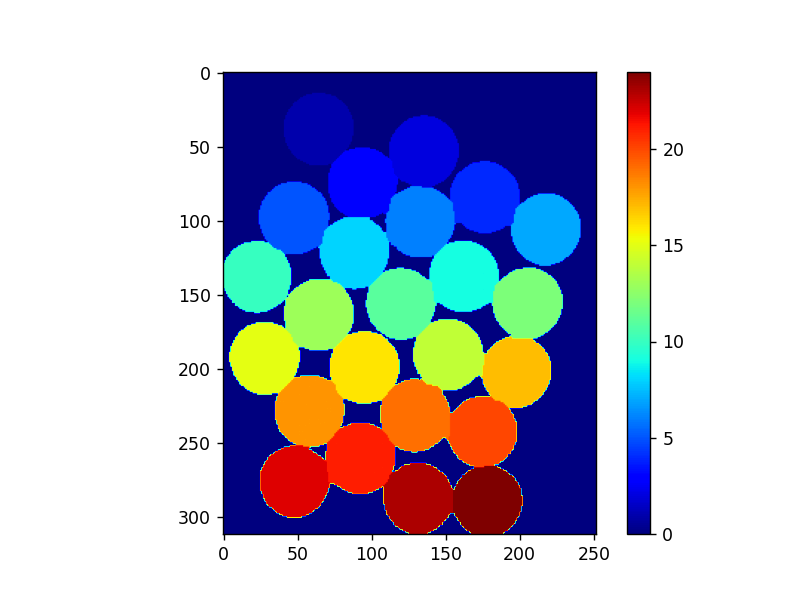

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [194]:
dt = nd.distance_transform_edt(th_img)
# coords = peak_local_max(dt, footprint=np.ones((3, 3)), labels=th_img)
# mask = np.zeros(dt.shape, dtype=bool)
# mask[tuple(coords.T)] = True

mask = dt > dt.max()-1
markers = label(mask)
labels = watershed(-dt, markers, mask=th_img)

fig = plt.figure()
plt.imshow(mask, cmap='jet')
plt.colorbar()
plt.show()

fig = plt.figure()
plt.imshow(labels, cmap='jet')
plt.colorbar()
plt.show()

print(np.unique(labels))




In [182]:
print(np.unique(labels))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [184]:
%matplotlib notebook

<IPython.core.display.Javascript object>


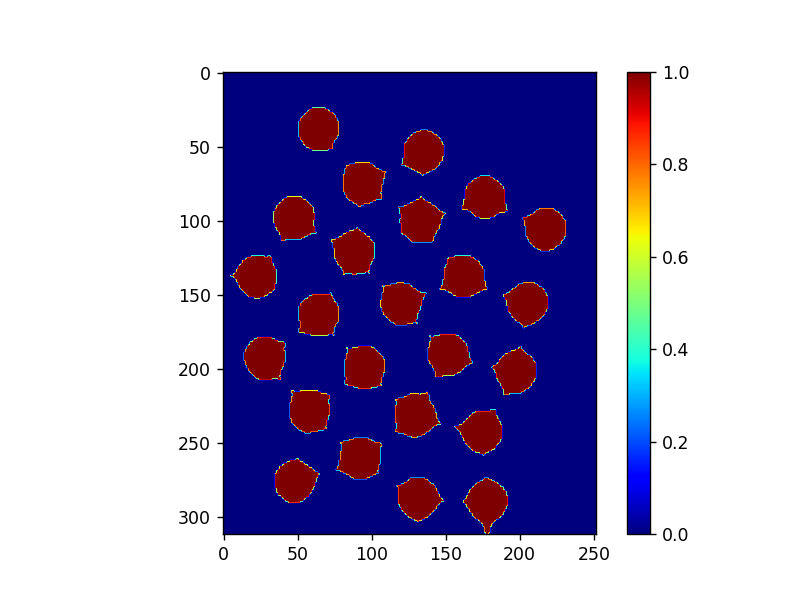

<IPython.core.display.Javascript object>


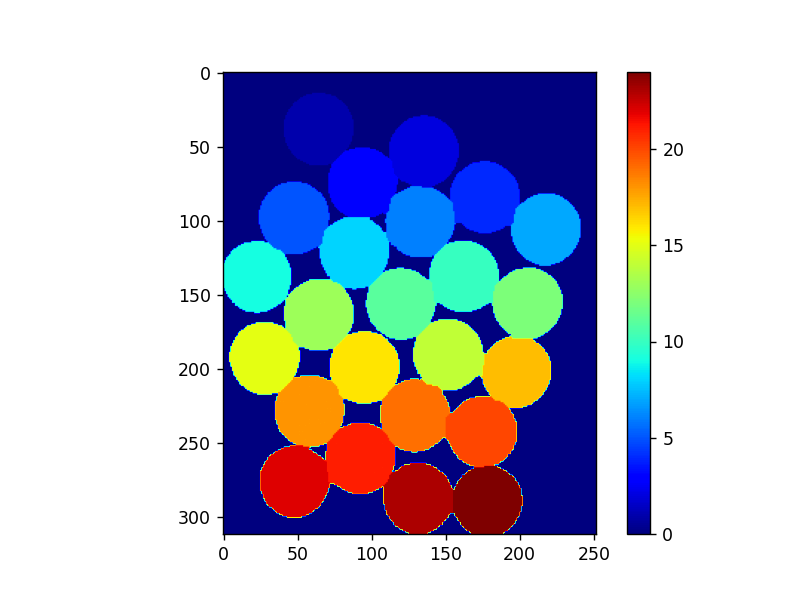

<IPython.core.display.Javascript object>


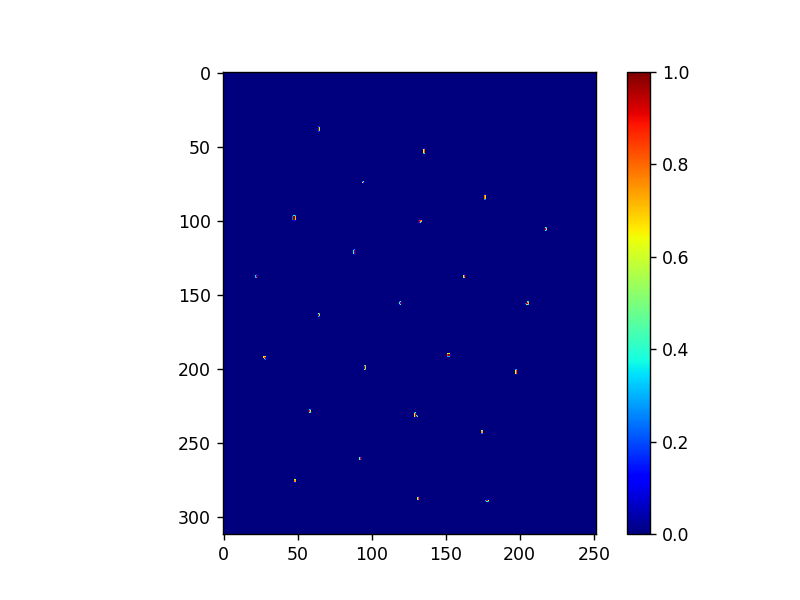

In [164]:
dt = nd.distance_transform_edt(th_img)
fig = plt.figure()
plt.imshow(dt>23, cmap='jet')
plt.colorbar()
plt.show()

In [165]:
np.unique(mask)

array([False,  True])

In [36]:



# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = nd.distance_transform_edt(image)
# coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
# mask = np.zeros(distance.shape, dtype=bool)
# mask[tuple(coords.T)] = True
markers, _ = nd.label(distance>15)

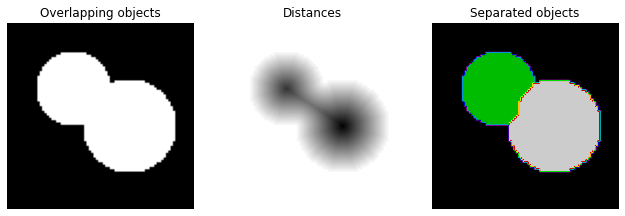

In [37]:
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [38]:
np.unique(markers)

array([0, 1, 2])